# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
# Import library yang dibutuhkan untuk klasifikasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import library untuk preprocessing dan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving _hasil clustered_bank_transactions.csv to _hasil clustered_bank_transactions.csv


In [15]:
df_classification = pd.read_csv('_hasil clustered_bank_transactions.csv')
df_classification.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-0.971275,Debit,San Diego,ATM,1.423718,Doctor,-0.552443,-0.206794,-0.000537,1
1,0.269440,Debit,Houston,ATM,1.311287,Doctor,0.305314,-0.206794,2.216472,0
2,-0.586882,Debit,Mesa,Online,-1.443277,Student,-0.909842,-0.206794,-1.023534,1
3,-0.387456,Debit,Raleigh,Online,-1.049768,Student,-1.353017,-0.206794,0.885797,1
4,-0.973468,Credit,Atlanta,Online,-1.049768,Student,1.120184,-0.206794,0.593589,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
#  Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Muat dataset hasil clustering
file_path = "_hasil clustered_bank_transactions.csv"  # Sesuaikan dengan lokasi file
df_classification = pd.read_csv(file_path)

# Pastikan dataset telah dimuat dengan benar
print("-  Dataset yang telah dimuat:")
print(df_classification.head())

# Pisahkan fitur (X) dan label (y)
X = df_classification.drop(columns=['Cluster'])  # Fitur
y = df_classification['Cluster']  # Label (target klasifikasi)

#  Pisahkan data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Tampilkan jumlah data setelah splitting
print("- Jumlah Data Training:", X_train.shape[0])
print("- Jumlah Data Testing:", X_test.shape[0])

-  Dataset yang telah dimuat:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0          -0.971275           Debit  San Diego     ATM     1.423718   
1           0.269440           Debit    Houston     ATM     1.311287   
2          -0.586882           Debit       Mesa  Online    -1.443277   
3          -0.387456           Debit    Raleigh  Online    -1.049768   
4          -0.973468          Credit    Atlanta  Online    -1.049768   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor            -0.552443      -0.206794       -0.000537   
1             Doctor             0.305314      -0.206794        2.216472   
2            Student            -0.909842      -0.206794       -1.023534   
3            Student            -1.353017      -0.206794        0.885797   
4            Student             1.120184      -0.206794        0.593589   

   Cluster  
0        1  
1        0  
2        1  
3        1  
4        0  
- 

In [17]:
# Identifikasi kolom kategorikal yang masih dalam format string
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print("- Kolom kategorikal yang perlu di-encode:", categorical_columns)

# Lakukan encoding menggunakan LabelEncoder
label_encoders = {}  # Simpan encoder untuk nanti
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le  # Simpan encoder jika nanti diperlukan inverse transform

#  Periksa kembali apakah semua fitur sudah numerik
print("\n-  Dataset setelah encoding:")
print(X_train.dtypes)

- Kolom kategorikal yang perlu di-encode: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

-  Dataset setelah encoding:
TransactionAmount      float64
TransactionType          int64
Location                 int64
Channel                  int64
CustomerAge            float64
CustomerOccupation       int64
TransactionDuration    float64
LoginAttempts          float64
AccountBalance         float64
dtype: object


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [10]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Latih model Random Forest
rf_model.fit(X_train, y_train)

#  Latih model SVM
svm_model.fit(X_train, y_train)

print(" Model telah berhasil dilatih!")

 Model telah berhasil dilatih!


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Prediksi menggunakan kedua model
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Hitung Akurasi dan F1-score untuk Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Hitung Akurasi dan F1-score untuk SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# 🔹 Tampilkan hasil evaluasi
print(f"- Random Forest - Akurasi: {rf_accuracy:.4f}, F1-Score: {rf_f1:.4f}")
print(f"- SVM - Akurasi: {svm_accuracy:.4f}, F1-Score: {svm_f1:.4f}")


- Random Forest - Akurasi: 1.0000, F1-Score: 1.0000
- SVM - Akurasi: 1.0000, F1-Score: 1.0000


Kedua algoritma, Random Forest dan SVM, menunjukkan kinerja yang sangat baik dengan hasil evaluasi yang identik, yaitu akurasi dan F1-Score 1.0000, yang menandakan bahwa keduanya mampu mengklasifikasikan data dengan sempurna tanpa kesalahan

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

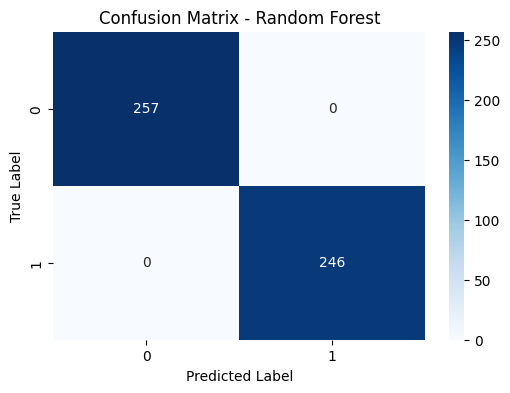

In [13]:
#  Buat confusion matrix untuk Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [14]:
#  Buat laporan performa model
classification_report_rf = classification_report(y_test, y_pred_rf)

# Tampilkan laporan performa model
print("- Laporan Evaluasi Model Random Forest:")
print(classification_report_rf)


- Laporan Evaluasi Model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       246

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



Analisis Hasil Model Klasifikasi
- Model yang digunakan: Random Forest
- Akurasi Model: 1.0000
- F1-Score Model: 1.0000

Analisis:

Model Random Forest menunjukkan performa yang sangat baik dengan akurasi mencapai 100%, tanpa ada kesalahan dalam klasifikasi, yang mengindikasikan kemampuan model dalam mengenali pola dengan sangat baik. Meskipun terdapat potensi overfitting, hasil ini bisa dianggap valid jika dataset yang digunakan cukup besar dan representatif. Kesimpulan: Model ini dapat diandalkan untuk prediksi klasifikasi dengan tingkat kepercayaan tinggi. Untuk pengujian lebih lanjut, disarankan untuk melakukan validasi tambahan menggunakan dataset baru.